# Most Likely Cause Voxel
Objective: Find $\displaystyle\arg\max_c \hat{m}^c \prod_{l=1}^{c^l-1} \left(1-\hat{m}^{g(l,xv)}\right)$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from scipy import interpolate
import os, csv, re

SCM Infinity: 0.0104976
SCM: [0.1, 0.09000000000000001, 0.08100000000000002, 0.1458, 0.23328000000000004, 0.244944, 0.09447840000000002, 0.010497599999999885]
Max: Voxel 5


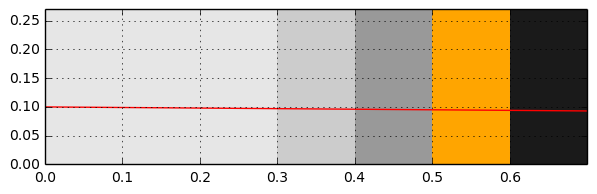

In [90]:
%matplotlib inline

m_ray = [0.1, 0.1, 0.1, 0.2, 0.4, 0.7, 0.9]
#m_ray = list(reversed(m_ray))
#m_ray = [0.50] * 15
voxel_size = 0.1

fig, ax = plt.subplots(figsize=(len(m_ray), 2))
ax.set_xlim([0, len(m_ray) * voxel_size])
#ax.set_ylim([0, voxel_size])

def verts(x):
    return [
        (x, 0), # left, bottom
        (x, 10), # left, top
        (x + voxel_size, 10), # right, top
        (x + voxel_size, 0), # right, bottom
        (0., 0.), # ignored
    ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]
   

scm = []
reachability = 1.
for i, mi in enumerate(m_ray):
    ax.add_patch(patches.PathPatch(Path(verts(i * voxel_size), codes), facecolor=str(1-mi), lw=0))
    
    scm.append(mi * reachability)
    reachability *= 1-mi

scm_inf = 1 - sum(scm)
print "SCM Infinity:", scm_inf
scm.append(scm_inf)

print "SCM:", scm
    
max_scm = 0
for i, s in enumerate(scm):
    if s > scm[max_scm]:
        max_scm = i

print "Max:", ("Voxel %i" % max_scm if max_scm < len(m_ray) else "Infinity")
ax.add_patch(patches.PathPatch(Path(verts(max_scm * voxel_size), codes), facecolor="orange", lw=0))

ax.plot(scm, c="red")
ax.set_xticks(np.arange(0, len(m_ray) * voxel_size, voxel_size))
ax.set_ylim([0, max(scm)*1.1])
ax.grid()